Hello Everyone

Welcome to my first project on Univariate Linear Regression.


In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression

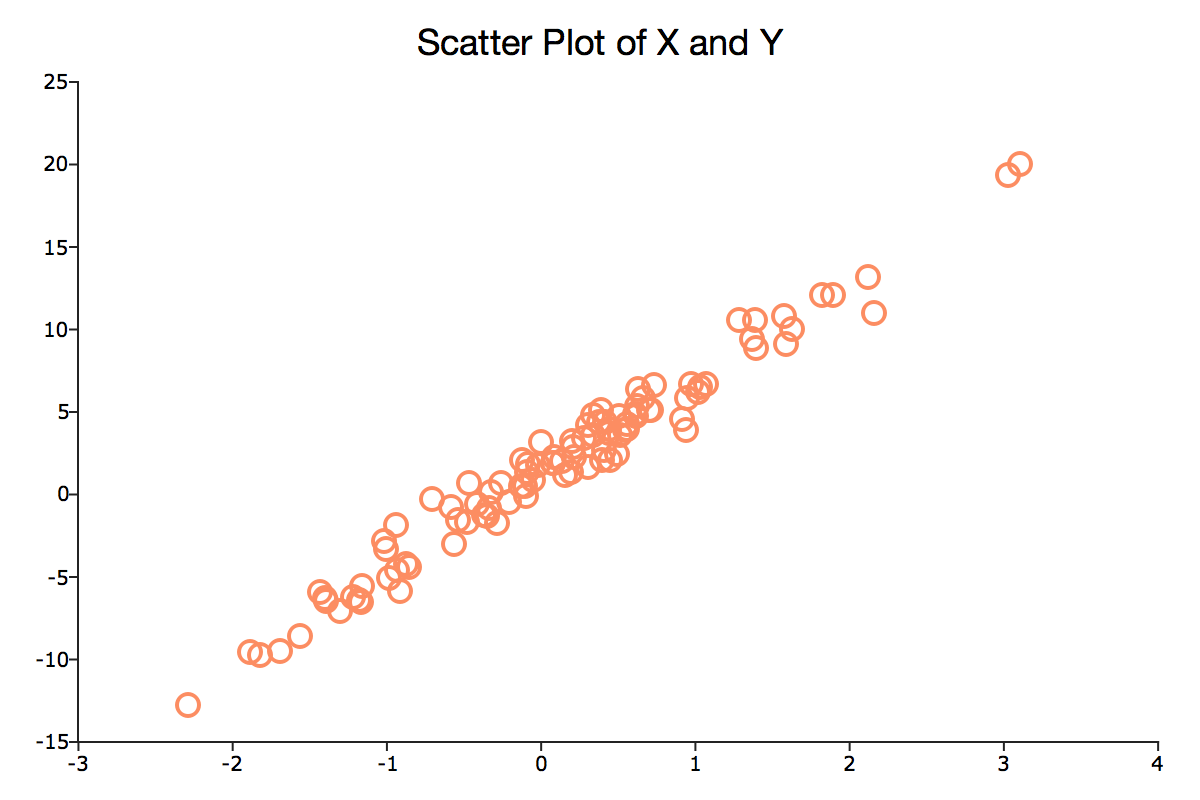

The above is an example of how a distribution supporting Linear Regression would look like.

So lets get started!

# Univariate Linear regression for Bike Sharing in Metro City

Our goal is to predict the Profit generated by Food Truck sharing in $10000's given by the variable of population

Our approach to this Simple case of machine learning is to construct a Linear Regression Model that will take input as population and give the best possible accurate prediction without using any ML Library like Sci-kit Learn,etc

##  Step 1: Importing the Data & Libraries

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [11]:
data =pd.read_csv('food_truck_data.txt')
plt.rcParams['figure.figsize']=(12,8)

In [12]:
##Checking the first 5 rows of data 

In [13]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


We have 97 entries of the Population and their corresponding profits generated

## Step 2: Visualizing the Data

Text(0.5, 1.0, 'Population Vs Profit')

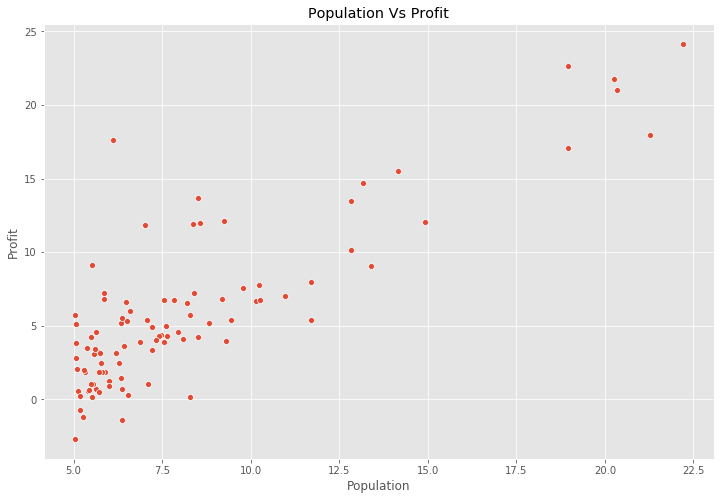

In [15]:
ax = sns.scatterplot(x='Population',y='Profit',data =data)
ax.set_title('Population Vs Profit')

## Step 3: Implementing Cost Function

In [40]:
def cost_function(X,y,theta):
    m = len(y)
    y_pred = X.dot(theta)
    error =(y_pred - y)**2
    
    return (1/(2*m))*(np.sum(error))

In [41]:
m = data.Population.values.size
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X,y,theta)

32.072733877455676

## Step 4: Implementing Gradient descent

In [42]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred - y))
        theta = theta - alpha*1/m*error
        costs.append(cost_function(X,y,theta))
    return theta,costs

In [43]:
theta,costs = gradient_descent(X,y,theta,alpha=0.01,iterations=2500)

print("h(x) = {} + {}(x1)".format(str(round(theta[0,0],2)),str(round(theta[1,0],2))))

h(x) = -3.85 + 1.19(x1)


## Step 5: Visualizing cost Function J($\Theta$)

In [44]:
#using a 3D Representation

from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i],theta_1[j]])
        cost_values[i,j]=cost_function(X,y,t)      
        

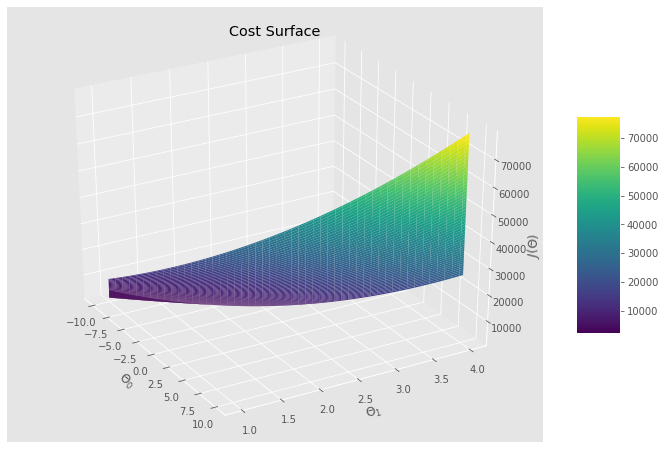

In [45]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

## Step 6: Plotting the convergence

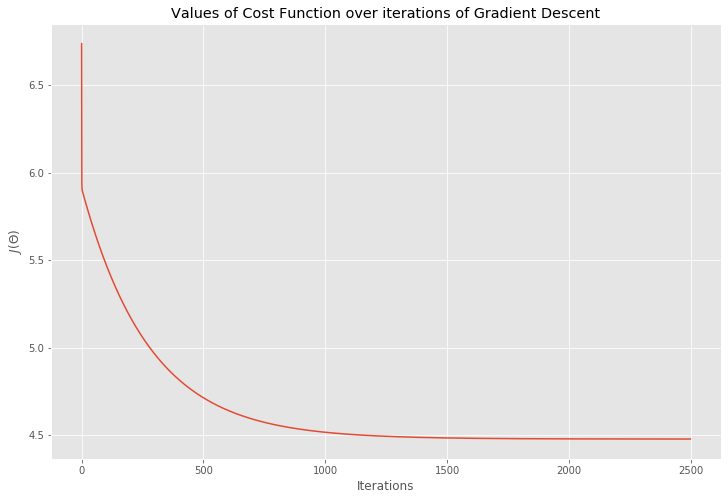

In [46]:

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

## Step 7: Training data with Linear Regression

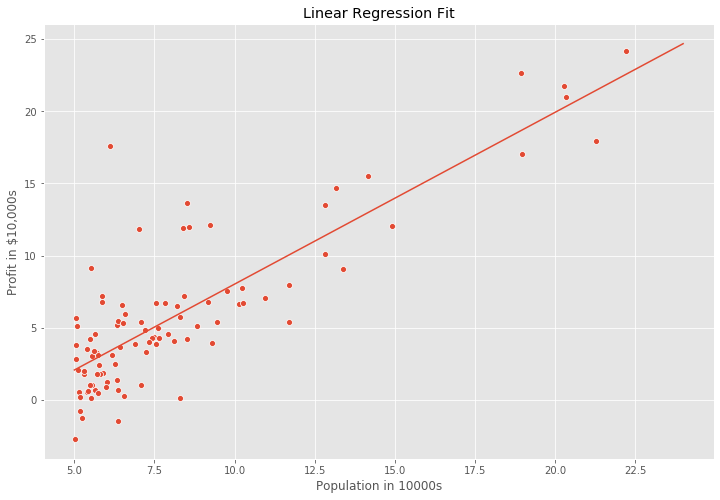

In [47]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y= "Profit", data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

## Step 8: Inference using optimized theta values

In [48]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [49]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print("For a population of 40,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000, the model predicts a profit of $9025.0


In [50]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000, the model predicts a profit of $"+str(round(y_pred_2, 0)))

For a population of 83,000, the model predicts a profit of $60137.0


In [51]:
y_pred_3 = predict(np.array([1, 11.3]), theta) * 10000
print("For a population of 113,000, the model predicts a profit of $"+str(round(y_pred_3, 0)))

For a population of 113,000, the model predicts a profit of $95796.0
